In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset
import CNN_RAVDESS

In [2]:
# interfacce function to get splited dataset
dataset_collection = dataset.getMFCCDatasetRAVDESS(train_size = 0.6, valid_size = 0.2, test_size = 0.2)

X_train = dataset_collection['X_train']
Y_train = dataset_collection['Y_train']
X_valid = dataset_collection['X_valid']
Y_valid = dataset_collection['Y_valid']
X_test = dataset_collection['X_test']
Y_test = dataset_collection['Y_test']

X_train_norm = dataset_collection['X_train_norm']
X_valid_norm = dataset_collection['X_valid_norm']
X_test_norm = dataset_collection['X_test_norm']

In [3]:
# convert array to tensor
X_train_norm = tf.convert_to_tensor(X_train_norm)
X_valid_norm = tf.convert_to_tensor(X_valid_norm)
X_test_norm = tf.convert_to_tensor(X_test_norm)
Y_train = tf.convert_to_tensor(Y_train)
Y_valid = tf.convert_to_tensor(Y_valid)
Y_test = tf.convert_to_tensor(Y_test)

X_train = tf.convert_to_tensor(X_train)
X_valid = tf.convert_to_tensor(X_valid)
X_test = tf.convert_to_tensor(X_test)

In [4]:
conv_model = CNN_RAVDESS.CNN.convolutional_model((512, 19))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 19)]         0         
                                                                 
 conv1d (Conv1D)             (None, 256, 4)            612       
                                                                 
 re_lu (ReLU)                (None, 256, 4)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 4)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 4)             68        
                                                                 
 softmax (Softmax)           (None, 32, 4)             0         
                                                             

In [6]:
print(X_train_norm)

tf.Tensor(
[[[-5.4983920e-01 -5.5363041e-01 -1.4092961e-01 ... -2.5848469e-01
   -1.3574040e+00  2.3843122e-01]
  [-7.2294259e-01 -8.5977495e-02 -2.5523686e-01 ... -8.4169632e-01
   -1.1510428e+00  8.8032842e-02]
  [-6.7588633e-01 -3.4177396e-01 -5.1557934e-01 ... -1.1099612e+00
   -9.8937291e-01  5.8448825e-02]
  ...
  [-1.3813107e-01 -1.1547028e-01  9.7018912e-02 ... -1.3094231e+00
    2.6381317e-01  2.8934171e-02]
  [-8.8395841e-02 -3.2245654e-01  7.1378037e-02 ... -1.6049105e+00
    2.6108646e-01 -2.0975611e-01]
  [-3.6862513e-01 -3.1488594e-01 -4.0555382e-01 ... -1.5147887e+00
    3.0672145e-01 -2.9889271e-01]]

 [[-4.5926553e-01 -5.3335142e-01 -2.2335181e+00 ... -1.2501929e+00
    1.8906899e-01 -3.3898550e-01]
  [-4.6285373e-01 -8.6805326e-01 -2.4624352e+00 ... -1.2837235e+00
   -2.7861878e-01 -3.2319021e-01]
  [-4.8644161e-01 -9.0656501e-01 -2.7393844e+00 ... -1.3787701e+00
   -3.7551612e-01 -3.0035886e-01]
  ...
  [ 1.2678493e+00 -1.0808389e+00 -1.3887513e-01 ...  3.7363682e-02

In [5]:
history = conv_model.fit(X_train_norm, Y_train, epochs=200, validation_data=(X_valid_norm, Y_valid))

Epoch 1/200
27/27 [==============================] - 3s 21ms/step - loss: 3.0603 - accuracy: 0.1195 - val_loss: 2.9304 - val_accuracy: 0.1123
Epoch 2/200
27/27 [==============================] - 0s 10ms/step - loss: 2.8316 - accuracy: 0.1381 - val_loss: 2.7857 - val_accuracy: 0.0947
Epoch 3/200
27/27 [==============================] - 0s 12ms/step - loss: 2.7118 - accuracy: 0.1555 - val_loss: 2.6976 - val_accuracy: 0.1018
Epoch 4/200
27/27 [==============================] - 0s 13ms/step - loss: 2.6293 - accuracy: 0.1845 - val_loss: 2.6293 - val_accuracy: 0.1263
Epoch 5/200
27/27 [==============================] - 0s 11ms/step - loss: 2.5661 - accuracy: 0.1972 - val_loss: 2.5702 - val_accuracy: 0.1298
Epoch 6/200
27/27 [==============================] - 0s 17ms/step - loss: 2.5104 - accuracy: 0.2123 - val_loss: 2.5172 - val_accuracy: 0.1439
Epoch 7/200
27/27 [==============================] - 1s 22ms/step - loss: 2.4610 - accuracy: 0.2065 - val_loss: 2.4671 - val_accuracy: 0.1544
Epoch 

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

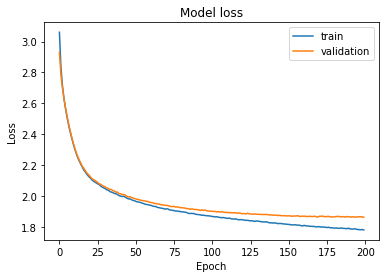

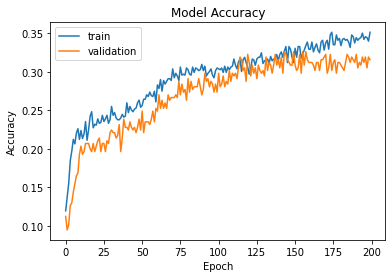

In [6]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')